In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import netcdf_file
import netCDF4
from geopy import distance
from scipy.ndimage import gaussian_filter1d
from scipy import signal
from statsmodels.tsa.tsatools import detrend

In [2]:
first_million_years = netCDF4.Dataset('fort.92_1f_extract.nc')
second_million_years = netCDF4.Dataset('fort.92_2f_extract.nc')
third_million_years = netCDF4.Dataset('fort.92_3f_extract.nc')
fourth_million_years = netCDF4.Dataset('fort.92_4f_extract.nc')
fifth_million_years = netCDF4.Dataset('fort.92_5f_extract.nc')
print(first_million_years)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: converted from binary
    projection: polarstereo
    history: Tue Jul 21 08:17:19 2020: ncks -d time,21,200,1 -v time,x1,y1,alatd,alond,darea,h,hb,hs,maskwater,sealev /iguana/s1/pollard/S3/Antarc/Run1f/fort.92_1f.nc fort.92_1f_extract.nc
    NCO: netCDF Operators version 4.7.5 (Homepage = http://nco.sf.net, Code = http://github.com/nco/nco)
    dimensions(sizes): y1(141), x1(141), time(180)
    variables(dimensions): float32 alatd(y1, x1), float32 alond(y1, x1), float32 darea(y1, x1), float32 h(time, y1, x1), float32 hb(time, y1, x1), float32 hs(time, y1, x1), float32 maskwater(time, y1, x1), float32 sealev(time), float32 time(time), float32 x1(x1), float32 y1(y1)
    groups: 


In [3]:
t = first_million_years.variables['time']
time = t[:]


In [4]:
alatd = first_million_years.variables['alatd']
alond = first_million_years.variables['alond']
h = first_million_years.variables['h']
t = first_million_years.variables['time']
alatd2 = second_million_years.variables['alatd']
alond2 = second_million_years.variables['alond']
h2 = second_million_years.variables['h']
t2 = second_million_years.variables['time']
alatd3 = third_million_years.variables['alatd']
alond3 = third_million_years.variables['alond']
h3 = third_million_years.variables['h']
t3 = third_million_years.variables['time']
alatd4 = fourth_million_years.variables['alatd']
alond4 = fourth_million_years.variables['alond']
h4 = fourth_million_years.variables['h']
t4 = fourth_million_years.variables['time']
alatd5 = fifth_million_years.variables['alatd']
alond5 = fifth_million_years.variables['alond']
h5 = fifth_million_years.variables['h']
t5 = fifth_million_years.variables['time']

In [5]:
MB_lat = -76.05
MB_lon = -136

latitude = alatd[:,:]
longitude = alond[:,:]
latitude2 = alatd2[:,:]
longitude2 = alond2[:,:]
latitude3 = alatd3[:,:]
longitude3 = alond3[:,:]
latitude4 = alatd4[:,:]
longitude4 = alond4[:,:]
latitude5 = alatd5[:,:]
longitude5 = alond5[:,:]

time_first_million = t[:]
time_second_million = t2[:]
time_third_million = t3[:]
time_fourth_million = t4[:]
time_fifth_million = t5[:]

time_all = np.concatenate((t5,t4,t3,t2,t))

In [6]:
maskwater1 = first_million_years.variables['maskwater']
maskwater2 = second_million_years.variables['maskwater']
maskwater3 = third_million_years.variables['maskwater']
maskwater4 = fourth_million_years.variables['maskwater']
maskwater5 = fifth_million_years.variables['maskwater']

ocean_or_floating = np.concatenate((maskwater5[:,:,:],maskwater4[:,:,:],maskwater3[:,:,:],maskwater2[:,:,:],maskwater1[:,:,:]))
# ocean_or_floating = maskwater1[:,:,:]
# print(np.argwhere(np.sum(ocean_or_floating,axis = 0) == 0 ))




In [7]:
mount_berlin = (MB_lat,MB_lon)
d = np.zeros(np.shape(latitude))
for i in range(np.shape(latitude)[0]):
    for j in range(np.shape(latitude)[1]):
        d[i,j] = distance.distance(mount_berlin,(latitude[i,j],longitude[i,j])).km


In [8]:
# print(np.argwhere(d == np.min(d)))
points_within_500_km = np.argwhere(d <= 500)
points_within_100_km = np.argwhere(d <= 200)
grounded_points_within_500_km = np.argwhere((d <= 500) & (np.sum(ocean_or_floating,axis = 0) == 0))
x_within_500km = points_within_500_km[:,0]
y_within_500km = points_within_500_km[:,1]


In [9]:
thickness_all = h[:,:,:]
thickness_all2 = h2[:,:,:]
thickness_all3 = h3[:,:,:]
thickness_all4 = h4[:,:,:]
thickness_all5 = h5[:,:,:]
thickness_all_5Myr = np.concatenate((thickness_all5,thickness_all4,thickness_all3,thickness_all2,thickness_all))
thickness0 = h[0,:,:]
x = np.arange(0,141)
y = np.arange(0,141)
X,Y =np.meshgrid(x,y)


In [10]:
doesnt_go_to_zero = [] #np.zeros(len(grounded_points_within_500_km[:,0]))
for i in range(len(grounded_points_within_500_km[:,1])):
    if np.any(thickness_all_5Myr[:,grounded_points_within_500_km[i,1],grounded_points_within_500_km[i,0]] == 0):
        doesnt_go_to_zero.append(False)
        
    else:
        doesnt_go_to_zero.append(True)

# print(doesnt_go_to_zero)
# print(np.shape(grounded_points_within_500_km))
# print(np.shape(grounded_points_within_500_km[doesnt_go_to_zero]))
grounded_points_within_500_above_0 = grounded_points_within_500_km[doesnt_go_to_zero]

In [11]:
points_that_dont_go_to_zero = []
for i in range(np.shape(latitude)[0]):
    for j in range(np.shape(latitude)[1]):
        if np.any(thickness_all[:,i,j] == 0):
            continue
        else:
            points_that_dont_go_to_zero.append([i,j])

no_zero = np.array(points_that_dont_go_to_zero)
print(no_zero)

[[ 18  90]
 [ 18  91]
 [ 18  92]
 ...
 [121  79]
 [121  80]
 [121  81]]


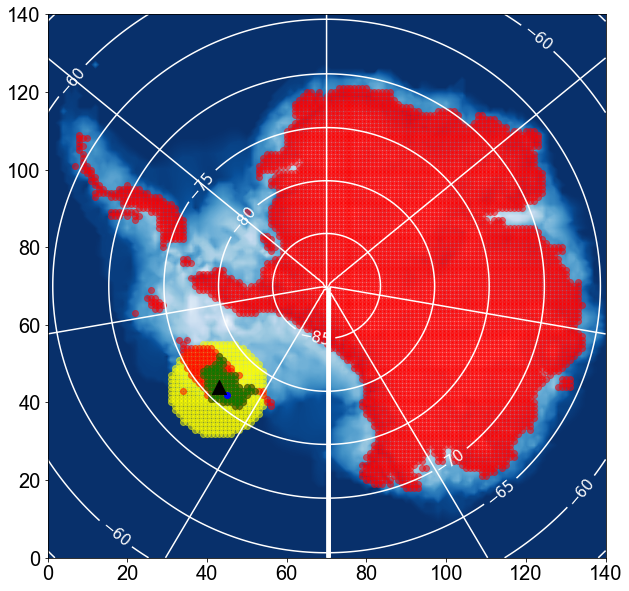

In [12]:
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10))
# cmap_reversed = plt.cm.get_cmap('autumn_r')
thick = ax.contourf(X,Y,thickness0,cmap = 'Blues_r',levels = 400)
# ax.clabel(thick, inline=True, fontsize=15)
lat = ax.contour(X,Y,latitude,colors = 'white',linestyles = 'solid')
lon = ax.contour(X,Y,longitude,colors = 'white',linestyles = 'solid')
ax.clabel(lat, inline=True, fontsize=15)
# ax.clabel(lon, inline=True, fontsize=10)
# ax[1,0].contourf(X,Y,latitude)
ax.scatter(points_within_500_km[:,0],points_within_500_km[:,1],color = 'yellow',alpha = 0.5)
# ax.scatter(points_within_100_km[:,0],points_within_100_km[:,1],color = 'blue',alpha = 0.5)
ax.scatter(np.argwhere(np.sum(ocean_or_floating,axis = 0) == 0 )[:,1],np.argwhere(np.sum(ocean_or_floating,axis = 0) == 0 )[:,0],color = 'r',alpha = 0.5)
# ax.scatter(no_zero[:,1],no_zero[:,0])

ax.scatter(grounded_points_within_500_above_0[:,1],grounded_points_within_500_above_0[:,0],color = 'g',alpha = 0.5)

# ax.scatter(points_within_500_km[:,0],points_within_500_km[:,1],color = 'r',alpha = 0.5)
ax.scatter(points_within_500_km[290,0],points_within_500_km[290,1],color = 'b')
ax.scatter(43,44,color = 'black',marker='^',s = 200)
# ax.scatter(45,49,color = 'black',marker='*',s = 200)
# ax[1,0].contour(X,Y,latitude == latitude[ij_lat],colors = 'red')
# ax[0,1].contourf(X,Y,longitude)
# ax[0,1].contour(X,Y,longitude == longitude[ij_lon],colors = 'red')
ax.tick_params(axis='both', which='major', labelsize=20)
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")

plt.savefig('grounded_within_500km_Mount_Berlin.png', format='png')



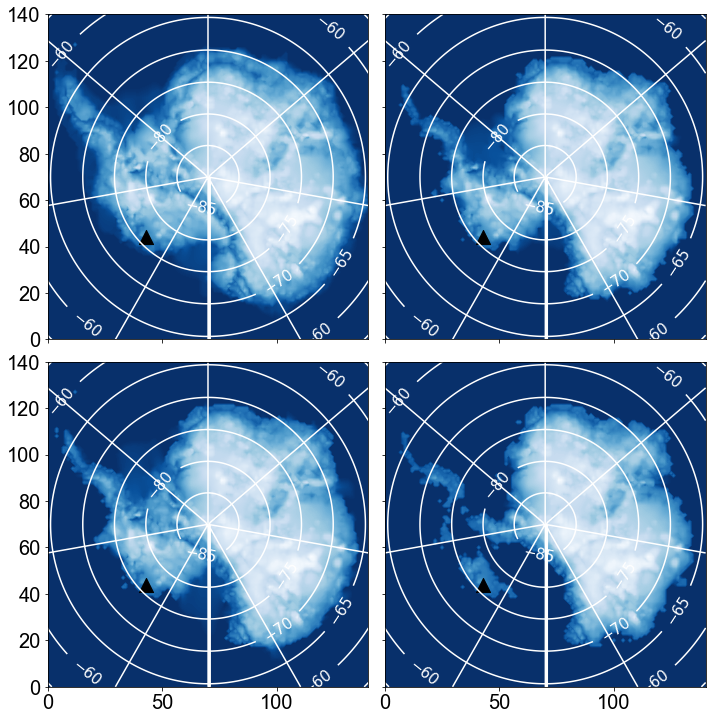

In [13]:
fig,ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,10),sharex = True, sharey = True)
# cmap_reversed = plt.cm.get_cmap('autumn_r')
thick = ax[0,0].contourf(X,Y,thickness0,cmap = 'Blues_r',levels = 200)
# ax.clabel(thick, inline=True, fontsize=15)
lat = ax[0,0].contour(X,Y,latitude,colors = 'white',linestyles = 'solid')
lon = ax[0,0].contour(X,Y,longitude,colors = 'white',linestyles = 'solid')
ax[0,0].clabel(lat, inline=True, fontsize=15)
# ax.clabel(lon, inline=True, fontsize=10)
# ax[1,0].contourf(X,Y,latitude)
# ax[0,0].scatter(points_within_500_km[:,0],points_within_500_km[:,1],color = 'yellow',alpha = 0.5)
# ax[0,0].scatter(np.argwhere(np.sum(ocean_or_floating,axis = 0) == 0 )[:,1],np.argwhere(np.sum(ocean_or_floating,axis = 0) == 0 )[:,0],color = 'r',alpha = 0.5)
# ax.scatter(points_within_500_km[:,0],points_within_500_km[:,1],color = 'r',alpha = 0.5)
# ax.scatter(points_within_500_km[290,0],points_within_500_km[290,1],color = 'b')
ax[0,0].scatter(43,44,color = 'black',marker='^',s = 200)
# ax[1,0].contour(X,Y,latitude == latitude[ij_lat],colors = 'red')
# ax[0,1].contourf(X,Y,longitude)
# ax[0,1].contour(X,Y,longitude == longitude[ij_lon],colors = 'red')

ax[0,1].contourf(X,Y,h[-1,:,:],cmap = 'Blues_r',levels = 200)
lat = ax[0,1].contour(X,Y,latitude,colors = 'white',linestyles = 'solid')
lon = ax[0,1].contour(X,Y,longitude,colors = 'white',linestyles = 'solid')
ax[0,1].clabel(lat, inline=True, fontsize=15)
ax[0,1].scatter(43,44,color = 'black',marker='^',s = 200)

ax[1,0].contourf(X,Y,h3[-1,:,:],cmap = 'Blues_r',levels = 200)
lat = ax[1,0].contour(X,Y,latitude,colors = 'white',linestyles = 'solid')
lon = ax[1,0].contour(X,Y,longitude,colors = 'white',linestyles = 'solid')
ax[1,0].clabel(lat, inline=True, fontsize=15)
ax[1,0].scatter(43,44,color = 'black',marker='^',s = 200)

ax[1,1].contourf(X,Y,h5[-1,:,:],cmap = 'Blues_r',levels = 200)
lat = ax[1,1].contour(X,Y,latitude,colors = 'white',linestyles = 'solid')
lon = ax[1,1].contour(X,Y,longitude,colors = 'white',linestyles = 'solid')
ax[1,1].clabel(lat, inline=True, fontsize=15)
ax[1,1].scatter(43,44,color = 'black',marker='^',s = 200)

for axes in ax.reshape(-1):
    axes.tick_params(axis='both', which='major', labelsize=20)
    for tick in axes.get_xticklabels():
        tick.set_fontname("Arial")
    for tick in axes.get_yticklabels():
        tick.set_fontname("Arial")

fig.tight_layout()

plt.savefig('WAIS_snapshots_through_time.png', format='png')

In [77]:
print(f'Max thickness in the first million years: {np.max(thickness_all[:,x_within_500km,y_within_500km])} meters')
print(f'Max thickness in the first million years: {np.max(thickness_all[:,grounded_points_within_500_km[:,1],grounded_points_within_500_km[:,0]])} meters')
print(np.shape(grounded_points_within_500_km))
# print(f'Max thickness in the second million years: {np.max(thickness_all2[:,x_within_500km,y_within_500km])} meters')
# print(f'Max thickness in the third million years: {np.max(thickness_all3[:,x_within_500km,y_within_500km])} meters')
# print(f'Max thickness in the fourth million years: {np.max(thickness_all4[:,x_within_500km,y_within_500km])} meters')
# print(f'Max thickness in the fifth million years: {np.max(thickness_all5[:,x_within_500km,y_within_500km])} meters')
print(np.argwhere(thickness_all == 2607.01220703125))

Max thickness in the first million years: 2613.477294921875 meters
Max thickness in the first million years: 2607.01220703125 meters
(154, 2)
[[ 37  45  49]
 [168  82  38]]


In [78]:
print(f'Max thickness in the first 1 million years: {np.min(thickness_all[:,x_within_500km,y_within_500km])}')
print(f'Max thickness in the first million years: {np.min(thickness_all[:,45,49])} meters')

print(f'Max thickness in the second 1 million years: {np.min(thickness_all2[:,x_within_500km,y_within_500km])}')
print(f'Max thickness in the third 1 million years: {np.min(thickness_all3[:,x_within_500km,y_within_500km])}')
print(f'Max thickness in the fourth 1 million years: {np.min(thickness_all4[:,x_within_500km,y_within_500km])}')
print(f'Max thickness in the fifth 1 million years: {np.min(thickness_all5[:,x_within_500km,y_within_500km])}')

Max thickness in the first 1 million years: 0.0
Max thickness in the first million years: 5.789196014404297 meters
Max thickness in the second 1 million years: 0.0
Max thickness in the third 1 million years: 0.0
Max thickness in the fourth 1 million years: 0.0
Max thickness in the fifth 1 million years: 0.0


In [138]:
fs = 1/5000
f_welch_tukey, P_welch_tukey= signal.welch(thickness_all_5Myr[:,50,50], fs,window = 'tukey', nperseg=len(thickness_all_5Myr[:,50,50])*0.15,scaling='spectrum')

/var/folders/vy/ds35gxq54qs5zxmq2j9p___00000gn/T/ipykernel_63922/1047588685.py:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.semilogx(1/f_welch_tukey, P_welch_tukey/np.max(P_welch_tukey),label = 'Tukey',color = 'black')


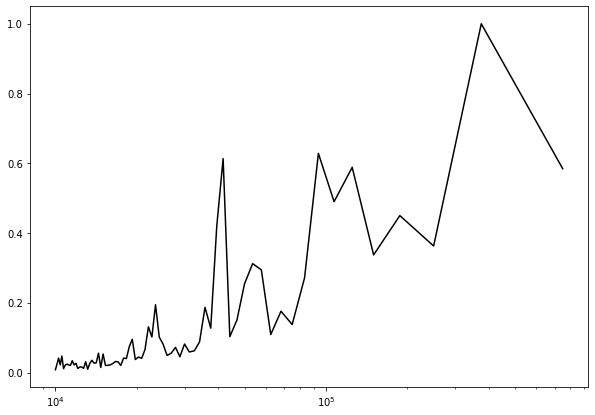

In [139]:
plt.figure(figsize = (10,7))
plt.semilogx(1/f_welch_tukey, P_welch_tukey/np.max(P_welch_tukey),label = 'Tukey',color = 'black')

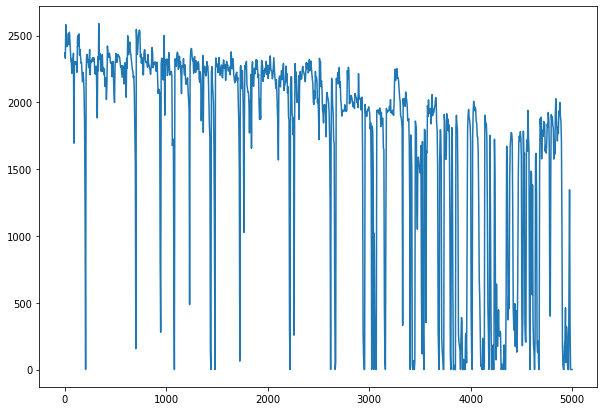

In [137]:
plt.figure(figsize=(10,7))
# plt.plot(-time_first_million/1000,thickness_all[:,grounded_points_within_500_km[:,1],grounded_points_within_500_km[:,0]])
plt.plot(-time_all/1000,thickness_all_5Myr[:,50,50])
# plt.ylim(2300,2500)
# plt.xlim(0,240)

In [256]:
fs = 1/5000
high = 1/30000
low = 1/55000
sos_clean = signal.butter(6,1/200000,'highpass',fs = fs,output = 'sos')
clean = np.flip(signal.sosfilt(sos_clean,np.flip(detrend(thickness_all[:,x_within_500km[290],y_within_500km[290]],order = 2))))
sos = signal.butter(6,[low,high],'bandpass',fs = fs,output = 'sos')
bandpassed_290 = signal.sosfilt(sos,clean)

In [257]:
1/200000

5e-06

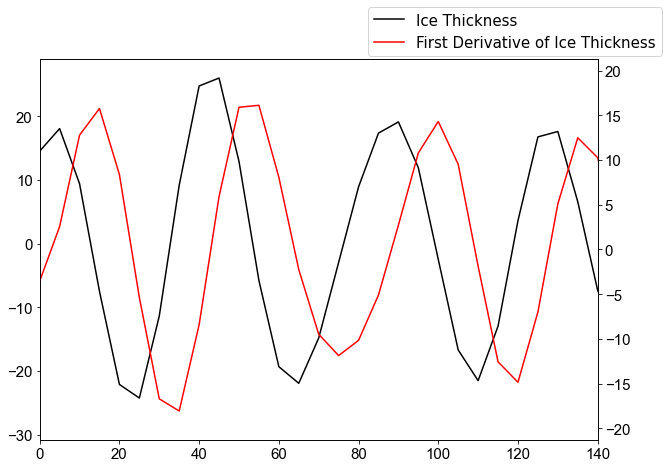

In [269]:
fig,ax = plt.subplots(figsize = (10,7))
ax.plot(-time_first_million/1000,bandpassed_290,color = 'black',label = 'Ice Thickness')
ax2 = ax.twinx()
ax2.plot(-time_first_million/1000,np.gradient(bandpassed_290),color = 'red', label = 'First Derivative of Ice Thickness')
# ax2.plot(-time_first_million/1000,thickness_all[:,x_within_500km[315],y_within_500km[315]])
ax.set_xlim(0,140)
# plt.ylim(-50,50)
ax.tick_params(axis='both', which='major', labelsize=15)
for tick in ax.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax.get_yticklabels():
    tick.set_fontname("Arial")
ax2.tick_params(axis='both', which='major', labelsize=15)
for tick in ax2.get_xticklabels():
    tick.set_fontname("Arial")
for tick in ax2.get_yticklabels():
    tick.set_fontname("Arial")

fig.legend(fontsize = 15)

(0.0, 140.0)

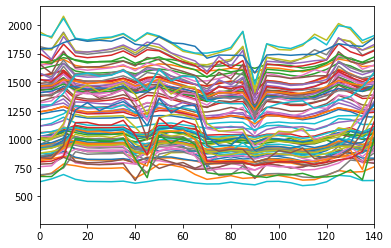

In [119]:
plt.plot(-time_first_million/1000,thickness_all[:,grounded_points_within_500_above_0[:,1],grounded_points_within_500_above_0[:,0]])
plt.xlim(0,140)
# plt.ylim(1200,2650)

In [86]:
np.min(thickness_all[:,grounded_points_within_500_km[:,1],grounded_points_within_500_km[:,0]])

0.0